# Modelo 2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

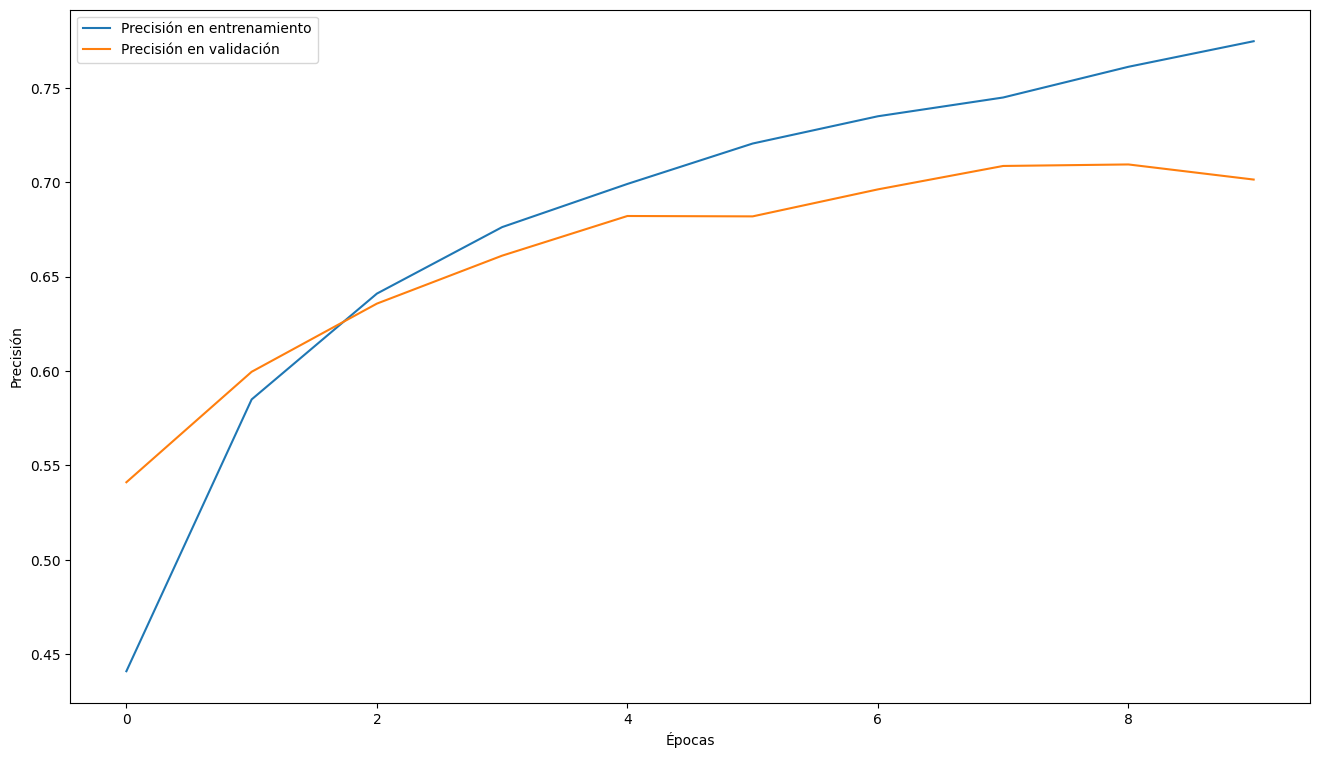

In [8]:
# Importar bibliotecas
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Cargar y dividir el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los valores de píxeles al rango [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definir el modelo de CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nPrecisión en el conjunto de prueba: {test_acc}')

# Visualizar la precisión y pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


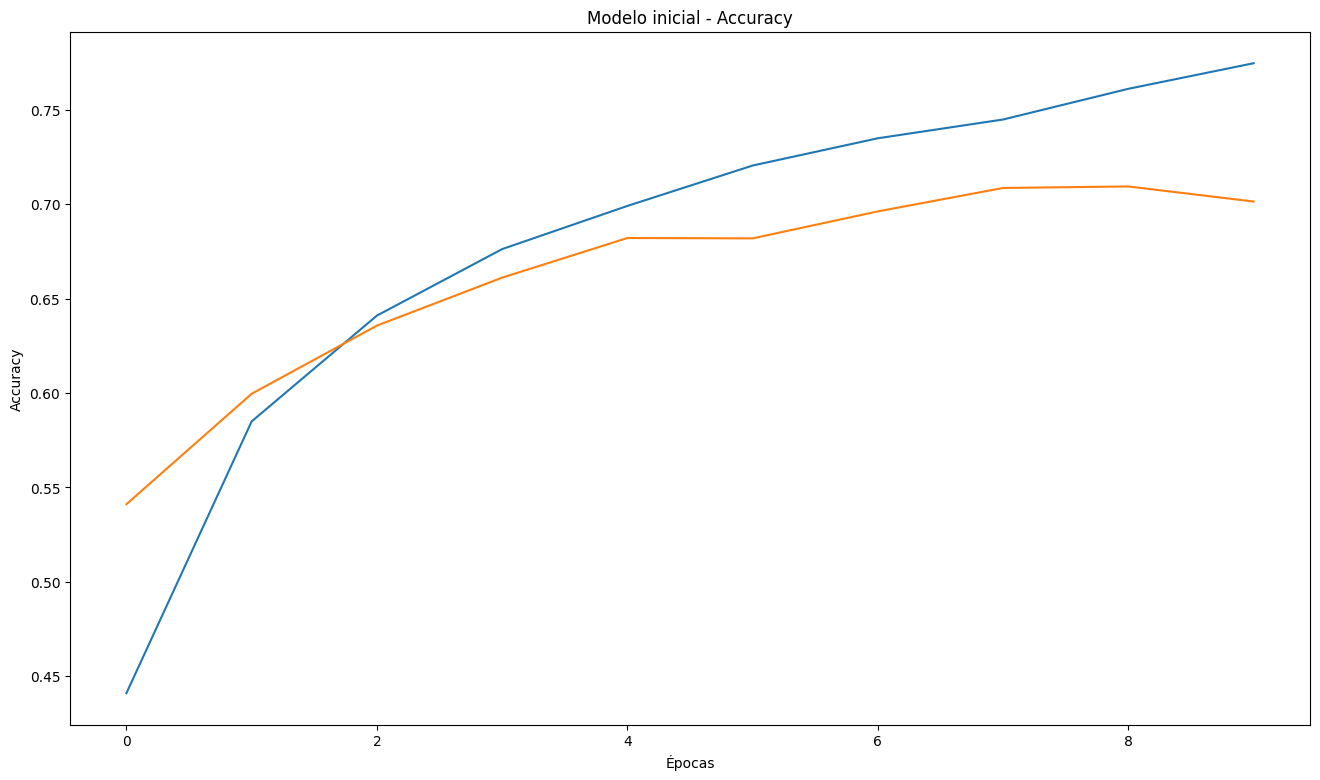

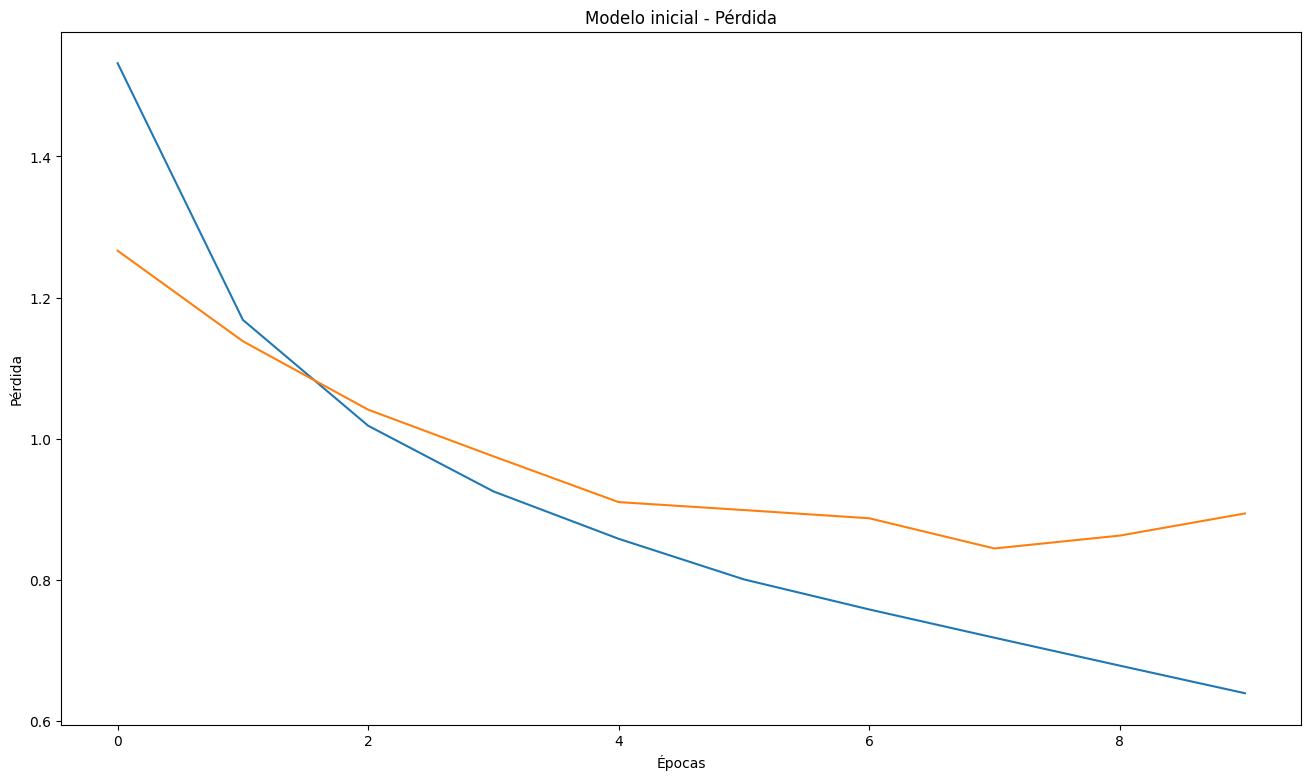

In [9]:
# Adagrad
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Modelo inicial - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Épocas')
plt.show()


plt.plot(history.history['loss'], label = 'Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label = 'Pérdida en validación')
plt.title('Modelo inicial - Pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.show()

# Modelo 1

In [3]:
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import numpy as np

# Seed
np.random.seed(1)

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
input_shape = X_train[0].shape

In [5]:
def get_model():

    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(32,32,3), activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))

    model.add(Dense(units=10, activation='softmax'))

    print('Model initialized. Please compile before training.')

    return model

In [6]:
batch_size = 128
epochs = 100

In [7]:
model_adagrad = get_model()

model_adagrad.summary()
adagrad = keras.optimizers.Adagrad()
model_adagrad.compile(loss='sparse_categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
history_adagrad= model_adagrad.fit(X_train, y_train, batch_size=batch_size,
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)


Model initialized. Please compile before training.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)

KeyboardInterrupt: ignored

In [ ]:
# Adagrad
plt.plot(history_adagrad.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history_adagrad.history['val_accuracy'], label='Precisión en validación')
plt.title('Modelo mejorado - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Épocas')
plt.show()


plt.plot(history_adagrad.history['loss'], label = 'Pérdida en entrenamiento')
plt.plot(history_adagrad.history['val_loss'], label = 'Pérdida en validación')
plt.title('Modelo mejorado - Pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.show()


In [ ]:
test_loss, test_acc = model_adagrad.evaluate(X_test, y_test)
print(f'\nPrecisión en el conjunto de prueba: {test_acc}')

# Predicción

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [25]:
def prediccion(img_path, model):
  img = image.load_img(img_path, target_size=(32, 32))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  # Obtener la predicción
  predictions = model.predict(img_array)
  class_index = np.argmax(predictions)
  confidence = predictions[0, class_index]

  class_name = str(class_index)
  print(f'Clase predicha: {class_name}')
  print(f'Confianza: {confidence}')

In [26]:
prediccion('/content/avion.png', model)

1/1 [==============================] - 0s 160ms/step
Clase predicha: 0
Confianza: 1.0


In [27]:
prediccion('/content/carro.png', model)

1/1 [==============================] - 0s 17ms/step
Clase predicha: 1
Confianza: 1.0


In [29]:
prediccion('/content/gato.png', model)

1/1 [==============================] - 0s 18ms/step
Clase predicha: 7
Confianza: 0.9999998807907104


In [30]:
prediccion('/content/venado.png', model)

1/1 [==============================] - 0s 22ms/step
Clase predicha: 0
Confianza: 1.0
